# Week 10 Problem 3

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/UI-DataScience/info490-fa16/blob/master/Week2/assignments/README.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nose.tools import assert_equal, assert_is_instance, assert_is, assert_is_not
from numpy.testing import assert_array_equal
from pandas.util.testing import assert_frame_equal

import warnings
warnings.filterwarnings("ignore")

# Problem 1.

For this problem, we are going to use the csv file `/home/data_scientist/data/2001/2001-1.csv`, which includes the first 500,000 rows of our familiar `/home/data_scientist/data/2001.csv` file. The code cell below loads the four columns, `Distance`, `ActualElapsedTime`, `ArrDelay`, and `Dest`, into a Pandas dataframe, which we will use to make plots. 

In [2]:
filepath = "/home/data_scientist/data/2001/2001-1.csv"
columns = ["Distance", "ActualElapsedTime", "ArrDelay", "Dest"]
df = pd.read_csv(filepath, encoding="latin-1", usecols=columns)
df = df.dropna()

## 1. Plot: Kernel density estimation

In the following code cell, write a function named `make_kdeplot()` that takes a Pandas dataframe, a column name (a string), and a optional parameter bandwidth (bw) to make a kernal density estimation (KDE) plot. The function returns a `matplotlib.Axes` object.

- It's better to use [seaborn.kdeplot()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html#seaborn.kdeplot) since it is easier to pass a `bw` parameter, but [seaborn.distplot()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot) could work as well.
- For the x axis label, use the column name string that is passed to the function as an input argument.
- Your plot should have a y axis label and a title as well.
- To pass the assertion tests, please do not set any parameters that could potentially change the data included in the plot. 

Here is an example plot using the `ActualElapsedTime` column:
![](p3_kde.png)

In [3]:
def make_kdeplot(df, col, bw=1):
    '''
    Makes a KDE plot using the specified column in the dataframe.
    
    Params
    -------
    df: a pd.DataFrame object
    col: a column name (a string)
    bw: (optional) bandwidth of the kdeplot
    
    Returns
    -------
    A matplotlib.Axes object
    '''
    # Create our figure and ax for further plot
    fig, ax = plt.subplots()
    # Make a kdeplot and set the bw and the shade
    sns.kdeplot(df[col], ax = ax, bw = bw, shade = True)
    # Set the xlabel of the plot
    ax.set_xlabel(col)
    # Set the ylabel of the plot
    ax.set_ylabel('Density')
    # Set the title of the plot
    ax.set_title('Kernel Density Estimation')
    
    return ax

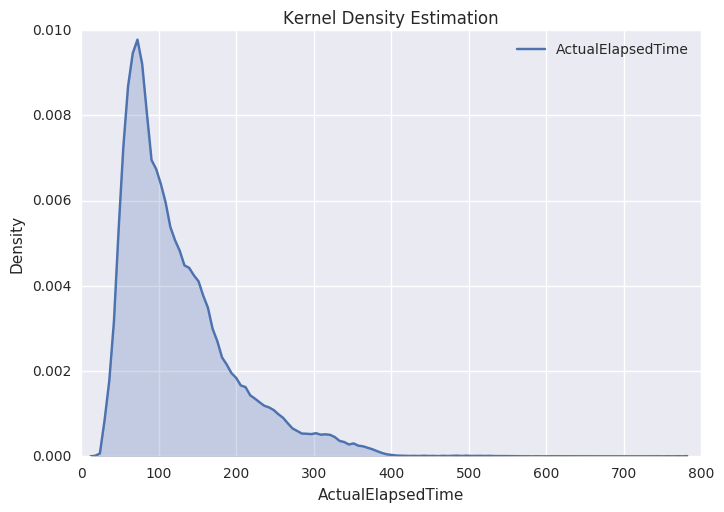

In [4]:
# execute your function; your plot should look similar to the example plot
ax = make_kdeplot(df, columns[1])

In [5]:
# assertions
# make a kdeplot
ax = make_kdeplot(df, columns[1])
plt.close()

# check title, axis labels
assert_is_instance(ax, mpl.axes.Axes, msg="Your function should return a matplotlib.axes.Axes object.")
assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is(ax.xaxis.get_label_text(), columns[1], msg="Change the x-axis label to the corresponding column name.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Your plot doesn't have a y-axis label.")

# check data
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
assert_array_equal([min(x), max(x)], [12.0, 782.0])
assert_array_equal([min(y), max(y)], [0.0, 0.0097750694299635205])

# make another kdeplot using a different column
ax2 = make_kdeplot(df, columns[2], bw=5)
plt.close()
assert_is(ax2.xaxis.get_label_text(), columns[2], msg="Change the x-axis label to the corresponding column name.")
x2 = ax2.lines[0].get_xdata()
y2 = ax2.lines[0].get_ydata()
assert_array_equal((min(x2), max(x2)), [-95.0, 1703.0])
assert_array_equal([min(y2), max(y2)], [0.0, 0.024272044285855398])

## 2. Plot: Hexbin plots

Write a function named `make_hexplot()` that takes a Pandas dataframe and two column names to make a joint hexbin plot. The function returns a Seaborn `JointGrid` object.

- Use [seaborn.jointplot()](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot) or [seaborn.JointGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.JointGrid.html#seaborn.JointGrid) to make a joint plot.
- The two plots on the sides are histograms (default). The main plot in the center is a hexbin plot.

Example:
![](p3_hexbin.png)

In [6]:
def make_hexplot(df, col1, col2):
    '''
    Makes a bivariate hexbin plot.
    
    Params
    -------
    df: a pd.DataFrame object
    col1: a column to put on x-axis
    col2: a column to put on y-axis
    
    Returns
    -------
    A seaborn.JointGrid object
    '''
    # Make a bivariate hexbin plot where col and col2 are respectively used in x-axis and y-axis
    return sns.jointplot(x = df[col1], y = df[col2], kind = "hex")

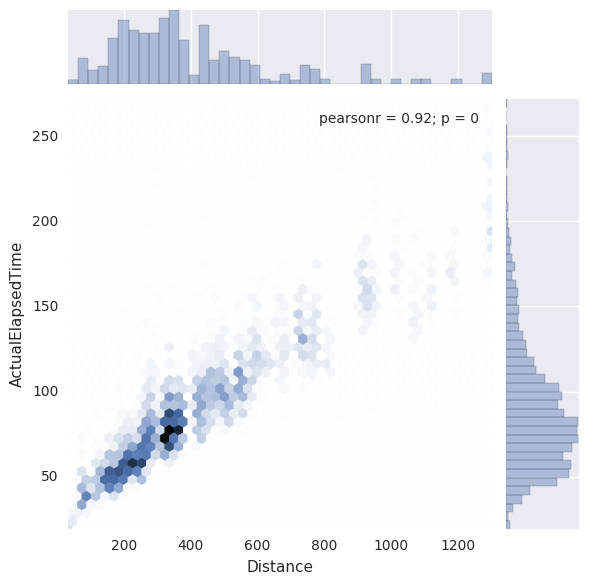

In [7]:
# execute your function; your plot should look similar to the example plot
# use the first 5000 rows in the dataframe to save time
joint = make_hexplot(df[:5000], columns[0], columns[1])

In [8]:
# assertions
# make a jointplot
joint = make_hexplot(df[:5000], columns[0], columns[1])
plt.close()

# check data
assert_is_instance(joint, sns.axisgrid.JointGrid)
assert_array_equal(joint.x, df[:5000][columns[0]])
assert_array_equal(joint.y, df[:5000][columns[1]])

# check histgrams on the sides
assert_equal(len(joint.ax_marg_x.patches), 42)
assert_equal(len(joint.ax_marg_y.patches), 50)

# check the hexbin plot in the middle
hexbin = joint.ax_joint.collections[0].get_array()
assert_equal(len(hexbin), 2465)
assert_array_equal([min(hexbin), max(hexbin)], [0.0, 110.0])

# another jointplot
joint2 = make_hexplot(df[:5000], columns[2], columns[2])
plt.close()
assert_array_equal(joint2.x, df[:5000][columns[2]])
assert_array_equal(joint2.y, df[:5000][columns[2]])
assert_equal(len(joint2.ax_marg_x.patches), 50)
assert_equal(len(joint2.ax_marg_y.patches), 50)
hexbin2 = joint2.ax_joint.collections[0].get_array()
assert_equal(len(hexbin2), 24299)
assert_array_equal([min(hexbin2), max(hexbin2)], [0.0, 368.0])

## 3. Plot: Visualizing pairwise relationships

Write a function named `make_pairplot` that takes a Pandas dataframe and a hue column name (a string) to make plot pairwise bivariate distributions of all the columns in the dataframe. The function returns a Seaborn `PairGrid` object.

- Use [seaborn.PairGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.PairGrid.html#seaborn.PairGrid) because we would like to have more flexibility.
- Use the hue column to map plot aspects to different colors.
- The diagonal subplots are **KDE** plots. 
- The nondiagonal subplots are **scatter** plots.

Example:
![](p3_pair.png)

In [9]:
def make_pairplot(df, huecol):
    '''
    Makes a pairplot of multiple pairwise bivariate distributions in a dataset.
    
    Params
    -------
    df: a pd.DataFrame object. All columns will be used in the pairplot
    hue: a column to map plot aspects to different colors
    
    Returns
    -------
    A seaborn.PairGrid object
    '''
    # Make a pairplot of pairwise bivariate distributions in the input df and map plot aspects to different colors
    g = sns.PairGrid(df, hue = huecol)
    # Specify the KDE plots as the digonal subplots
    g.map_diag(sns.kdeplot)
    # Specify the scatter plot as the nondiagonal subplots
    g.map_offdiag(plt.scatter)
    # Add the legend to the plot
    g.add_legend()
    
    return g

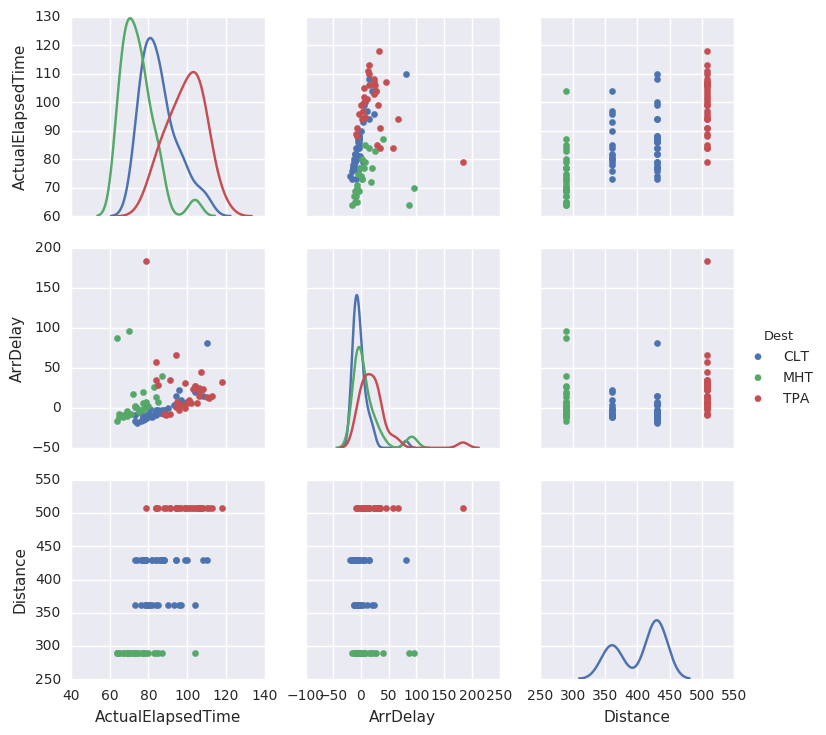

In [10]:
pair = make_pairplot(df[:100], columns[3])

In [11]:
# assertions
# make a pairplot
pair = make_pairplot(df[:100], columns[3])
plt.close()

# check data
assert_is_instance(pair, sns.axisgrid.PairGrid)
assert_frame_equal(pair.data, df[:100])

# check legend
assert_equal(pair.hue_names, ['CLT', 'MHT', 'TPA'])

# check diagonal kde plots
for d in pair.diag_axes:
    assert_equal(len(d.lines), 3, msg="The nondiagonal subplots should be KDE plots with 3 lines each.")
l1 = pair.diag_axes[0].lines[0].get_xydata()
assert_array_equal([np.min(l1), np.max(l1)], [8.5613566514262593e-05, 122.32653970546926])
l2 = pair.diag_axes[1].lines[2].get_xydata()
assert_array_equal([np.min(l2), np.max(l2)], [-37.440954535726235, 212.44095453572623])
l3 = pair.diag_axes[2].lines[0].get_xydata()
assert_array_equal([np.min(l3), np.max(l3)], [0.00023714991522256253, 480.86510129524527])

# check nondiagonal scatter plots
for i in range(3):
    for j in range(3):
        if i != j:
            assert_is_instance(pair.axes[i][j].collections[0], mpl.collections.PathCollection, 
                               msg="The nondiagonal subplots should be scatter plots.")